# Takım Koordinatları ve HSS Bölgeleri Analizi

## **2. Telemetri Verilerinin Analizi**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "Zaman": ["00:00:01", "00:00:02", "00:00:03", "00:00:04"],
    "Yükseklik": [100, 105, 110, 115],
    "Hız": [50, 52, 53, 54],
    "Batarya": [95, 94, 93, 92]
}


df = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
plt.plot(df["Zaman"], df["Yükseklik"], label="Yükseklik", marker="o")
plt.plot(df["Zaman"], df["Hız"], label="Hız", marker="x")
plt.plot(df["Zaman"], df["Batarya"], label="Batarya", marker="s")
plt.title("Telemetri Verileri")
plt.xlabel("Zaman")
plt.ylabel("Değerler")
plt.legend()
plt.grid()
plt.show()

## Diğer Takımların Koordinatlarını Gösterme

In [ ]:
import folium

# Harita merkezi (yakın koordinatlar)
map_center = [39.92077, 32.85411]  # Örneğin, Ankara koordinatları
m = folium.Map(location=map_center, zoom_start=13)

# Takımların hedef koordinatları (yakın lokasyonlar)
teams = [
    {'team': 'Team A', 'lat': 39.925533, 'lon': 32.866287, 'label': 'Target A'},
    {'team': 'Team B', 'lat': 39.923000, 'lon': 32.867500, 'label': 'Target B'},
    {'team': 'Team C', 'lat': 39.924000, 'lon': 32.868000, 'label': 'Target C'},
    {'team': 'Team D', 'lat': 39.926000, 'lon': 32.869000, 'label': 'Target D'}
]

# Haritaya hedefleri ekle
for team in teams:
    folium.Marker(
        location=[team['lat'], team['lon']],
        popup=f"{team['team']} - {team['label']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Haritayı görüntüle
m


## Takımların Hareketinin Zamanla İzlenmesi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Takımların zaman içindeki koordinat verileri
team_a_positions = {'Time': [0, 1, 2, 3, 4], 'Lat': [39.925, 39.926, 39.927, 39.928, 39.929], 'Lon': [32.866, 32.867, 32.868, 32.869, 32.870]}
team_b_positions = {'Time': [0, 1, 2, 3, 4], 'Lat': [41.008, 41.009, 41.010, 41.011, 41.012], 'Lon': [28.978, 28.979, 28.980, 28.981, 28.982]}

# Verileri DataFrame'e dönüştür
team_a_df = pd.DataFrame(team_a_positions)
team_b_df = pd.DataFrame(team_b_positions)

# Çizim
plt.figure(figsize=(10, 6))

# Takım A'nın hareketini farklı bir şekilde çizme
plt.plot(team_a_df['Time'], team_a_df['Lat'], label='Team A - Latitude', marker='D', markersize=8, linestyle='-', color='mediumblue', linewidth=2)
plt.plot(team_a_df['Time'], team_a_df['Lon'], label='Team A - Longitude', marker='s', markersize=8, linestyle='-.', color='cornflowerblue', linewidth=2)

# Takım B'nin hareketini farklı bir şekilde çizme
plt.plot(team_b_df['Time'], team_b_df['Lat'], label='Team B - Latitude', marker='^', markersize=8, linestyle='--', color='darkred', linewidth=2)
plt.plot(team_b_df['Time'], team_b_df['Lon'], label='Team B - Longitude', marker='x', markersize=8, linestyle=':', color='indianred', linewidth=2)

# Başlık, etiketler ve düzenlemeler
plt.title('Takımların Zaman İçindeki Koordinat Değişimi', fontsize=16)
plt.xlabel('Zaman (s)', fontsize=12)
plt.ylabel('Koordinatlar', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Görselleştirmeyi gösterme
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import folium

# Takımların zaman içindeki koordinat verileri (Ankara koordinatlarında)
team_a_positions = {
    'Time': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Lat': [39.925, 39.926, 39.927, 39.928, 39.929, 39.930, 39.931, 39.932, 39.933, 39.934],
    'Lon': [32.866, 32.867, 32.868, 32.869, 32.870, 32.871, 32.872, 32.873, 32.874, 32.875]
}

team_b_positions = {
    'Time': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Lat': [39.920, 39.921, 39.922, 39.923, 39.924, 39.925, 39.926, 39.927, 39.928, 39.929],
    'Lon': [32.860, 32.861, 32.862, 32.863, 32.864, 32.865, 32.866, 32.867, 32.868, 32.869]
}

# Verileri DataFrame'e dönüştür
team_a_df = pd.DataFrame(team_a_positions)
team_b_df = pd.DataFrame(team_b_positions)

# Koordinatları basitleştirme (örneğin her iki saniyede bir nokta seçme)
team_a_simplified = team_a_df.iloc[::2]  # 2 adımda bir noktayı seç
team_b_simplified = team_b_df.iloc[::2]  # 2 adımda bir noktayı seç

# Harita merkezi (Ankara koordinatları)
map_center = [39.92077, 32.85411]
m = folium.Map(location=map_center, zoom_start=14)

# Takım A'nın hareketi için dairesel rota çiz
center_lat = 39.925  # Dairenin merkezi (takım A'nın başlangıç noktası)
center_lon = 32.866
radius = 0.002  # Dairenin yarıçapı (yaklaşık olarak 200m)

# Dairenin 360 derece boyunca noktalarını hesapla
import numpy as np
angles = np.linspace(0, 2 * np.pi, 100)
circle_latitudes = center_lat + radius * np.sin(angles)
circle_longitudes = center_lon + radius * np.cos(angles)

# Dairenin noktalarını haritaya çiz
team_a_circle = list(zip(circle_latitudes, circle_longitudes))
folium.PolyLine(team_a_circle, color='blue', weight=3, opacity=0.7).add_to(m)

# Takım B'nin basitleştirilmiş hareket yolunu çiz
team_b_path = list(zip(team_b_simplified['Lat'], team_b_simplified['Lon']))
folium.PolyLine(team_b_path, color='red', weight=3, opacity=0.7).add_to(m)

# Haritayı göster
m


## HSS Bölgelerinin Harita Üzerinde Gösterilmesi

In [ ]:
import folium

# HSS bölgeleri: Taktik alanlar, diğer takımların yer aldığı bölgeler (Koordinatlar yakın)
hss_areas = [
    {'lat': 39.925533, 'lon': 32.866287, 'radius': 300, 'label': 'HSS Bölgesi 1'},  # Ankara, HSS Bölgesi 1
    {'lat': 39.930000, 'lon': 32.870000, 'radius': 350, 'label': 'HSS Bölgesi 2'},  # Yakın koordinat, HSS Bölgesi 2
    {'lat': 39.920000, 'lon': 32.860000, 'radius': 400, 'label': 'HSS Bölgesi 3'},  # Yeni HSS Bölgesi 3
    {'lat': 39.915000, 'lon': 32.860500, 'radius': 250, 'label': 'HSS Bölgesi 4'},  # Yeni HSS Bölgesi 4
    {'lat': 39.935000, 'lon': 32.875000, 'radius': 450, 'label': 'HSS Bölgesi 5'}   # Yeni HSS Bölgesi 5
]

# Harita merkezi (Ankara örneği)
map_center = [39.92077, 32.85411]
m = folium.Map(location=map_center, zoom_start=14)

# HSS alanlarını haritaya ekleyelim
for area in hss_areas:
    folium.Circle(
        location=[area['lat'], area['lon']], 
        radius=area['radius'], 
        color='red', 
        fill=True, 
        fill_color='red', 
        fill_opacity=0.2
    ).add_to(m)

# HSS alanlarını işaretleyelim
for area in hss_areas:
    folium.Marker(
        location=[area['lat'], area['lon']],
        popup=area['label'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Haritayı görüntüle
m


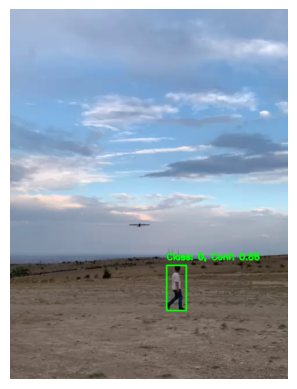

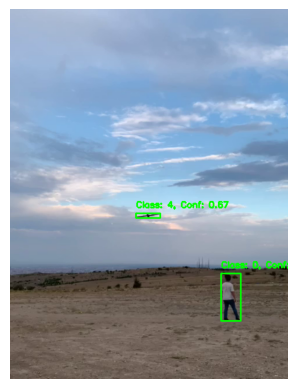

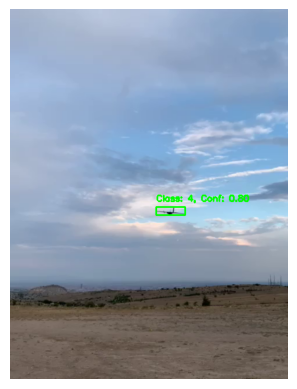

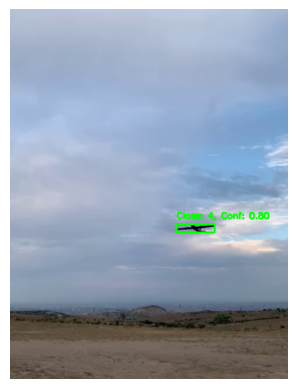

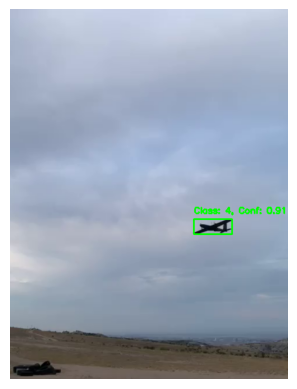

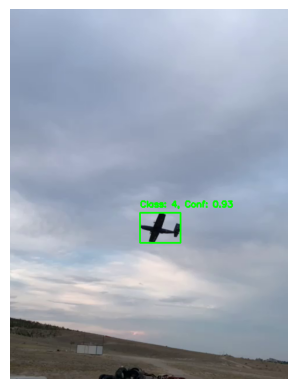

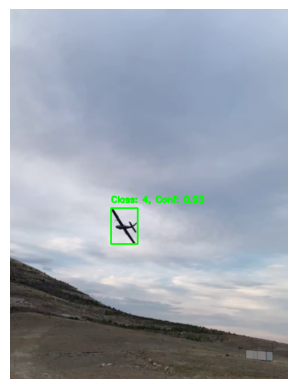

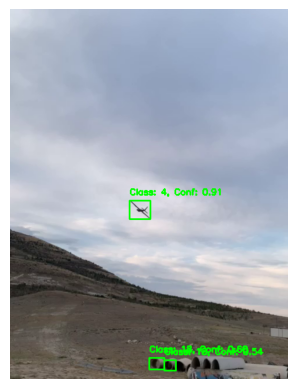

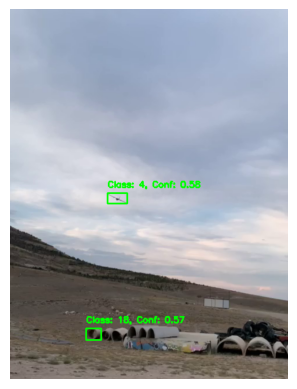

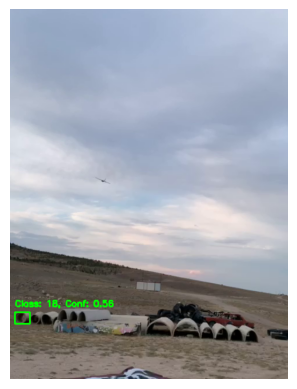

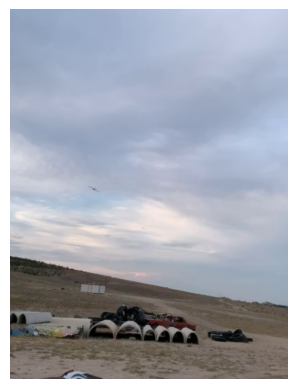

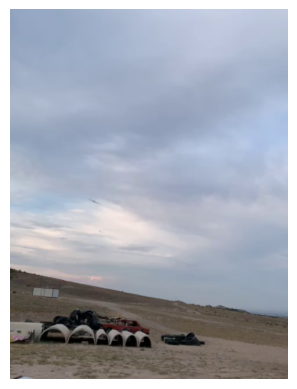

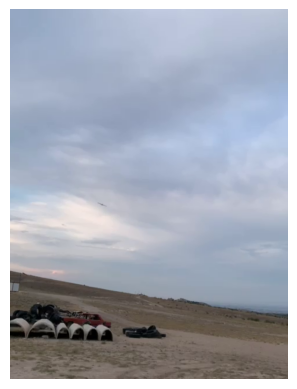

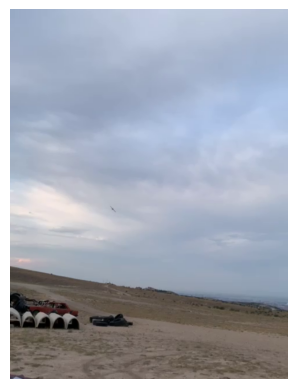

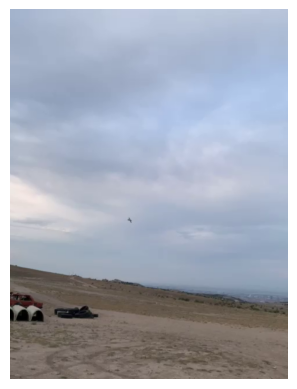

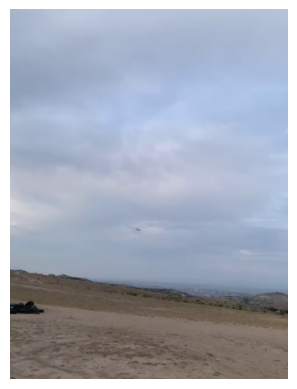

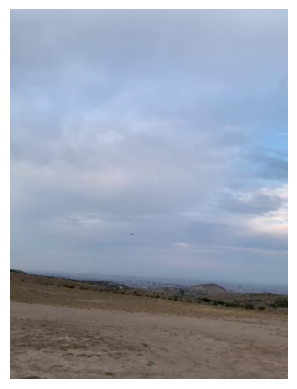

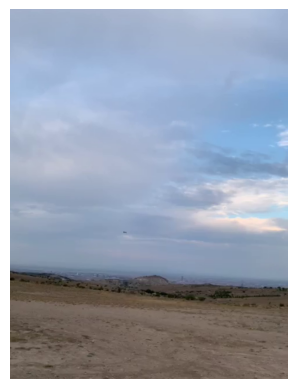

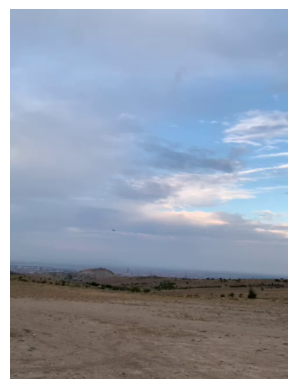

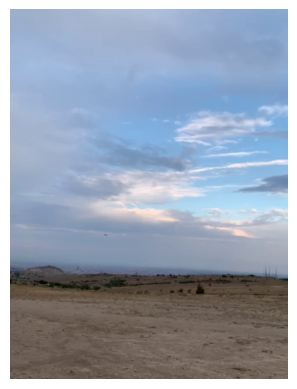

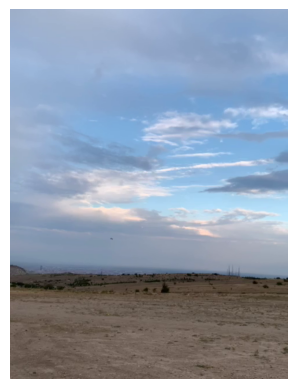

In [9]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# YOLOv8 modelini yükleyin
model = YOLO("yolov8s.pt") 
video_path = 'deneme.mp4'  
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

frame_counter = 0 

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    
    results = model.predict(frame, verbose=False) 

    
    for box in results[0].boxes:
        
        x_center, y_center, w, h = box.xywh[0].tolist()  # Koordinatlar
        confidence = box.conf[0].item()  # Güven skoru
        class_id = int(box.cls[0].item())  # Sınıf etiketi

    
        if confidence > 0.5:
            x_center = int(x_center)
            y_center = int(y_center)
            w = int(w)
            h = int(h)

            x1 = x_center - w // 2
            y1 = y_center - h // 2
            x2 = x_center + w // 2
            y2 = y_center + h // 2

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"Class: {class_id}, Conf: {confidence:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    if frame_counter % 30 == 0: 
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.axis('off') 
        plt.show()

    frame_counter += 1

cap.release()
